In [25]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

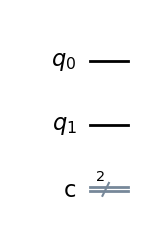

In [26]:
# Basic circuit
# A circuit is made up of registers. a register can be either quantum or classical
# a quantum register is made up of one qubit
# classical is made up of a normal bit
# in a circuit, there needs to be at least one register of any type
# here we have a circuit with 2 classical registers and 2 classical registers
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')

circuit = QuantumCircuit(qreg_q, creg_c)
circuit.draw("mpl")    


In [27]:
# Adding gates
# see ibm composer: https://quantum.ibm.com/composer/files/new
# sometimes you will have to write code for gates but a lot of the time you can use ibm composer


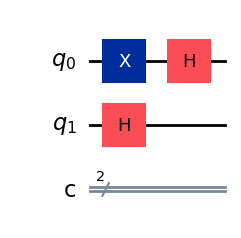

In [35]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
 
# adding gates: ***important the order in which you write the code is the order in which gates happen on a given register
circuit.x(qreg_q[0])
circuit.h(qreg_q[0])   
circuit.h(qreg_q[1])
# note another way to write the above 2 lines is circuit.h([0, 1])  

circuit.measure(qreg_q[0], creg_c[0]) # measure() inputs are qubit being measured and the classical bit to put the measurement into. Note this only measures one qubit
# you could use the circuit.measure_all() method but this measure all qubits instead of one qubit

circuit.draw("mpl")  


In [30]:
# Simulation

In [31]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
 
circuit.x(qreg_q[0])
circuit.h(qreg_q[0])   
circuit.h(qreg_q[1]) 
circuit.measure(qreg_q[0], creg_c[0])

# simulator stuff begins
from qiskit_aer.backends.qasm_simulator import QasmSimulator
from qiskit import transpile

simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator) 

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit , shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)

print(counts)  
# note that we only get 2 because we only measured the first qubit (far right)
# if we measured both qubits we would get EXPECT to get 4 combinations (as both qubits are in superposition)

{'00': 493, '01': 507}


In [ ]:
# Conditional adding of gates

binary help 255
binary help 11111111


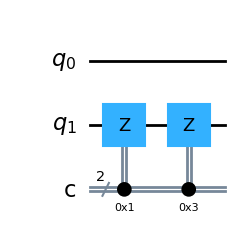

In [34]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
 
# the c_if(creg_c, NUMBER) method evaluates to true if NUMBER corresponds to the measurements on the classical registers.

#    0     1     2     3      < NUMBER from changing the binary in the classical register to an integer
# ['00', '01', '10', '11',]   < qubit measurement binary string. 1st entry means both qubit0 and qubit1 are measured to be 0. 2nd entry means qubit0 is measured to be 1 and qubit1 is 0.

# if you need help translating binary and vice versa
print("binary help", int('11111111', 2))
print("binary help", "{0:b}".format(255))

# conditionally adding gates
circuit.z(qreg_q[1]).c_if(creg_c, 1)  #adds a z gate if qubit0 is a 1 

# conditionally adding gates
circuit.z(qreg_q[1]).c_if(creg_c, 3)  #adds a z gate if qubit0 is a 1 AND qubit1 is a 1 

circuit.draw("mpl")   

